<a href="https://colab.research.google.com/github/paurnavi25/ML-Virtual_Internship_Project-1-/blob/main/Task1_Pavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

df.head()

Saving Dataset .csv to Dataset  (1).csv
User uploaded file "Dataset  (1).csv" with length 2249716 bytes


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
data = df.copy()

data = data.drop(['Restaurant ID', 'Restaurant Name', 'Address',
                  'Locality', 'Locality Verbose',
                  'Rating color', 'Rating text'], axis=1)

#Filling missing values in Cuisines column
data['Cuisines'] = data['Cuisines'].fillna('Unknown')

#Converting Yes/No columns to 1/0
convert_cols = ['Has Table booking', 'Has Online delivery',
                'Is delivering now', 'Switch to order menu']

for col in convert_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   City                  9551 non-null   object 
 2   Longitude             9551 non-null   float64
 3   Latitude              9551 non-null   float64
 4   Cuisines              9551 non-null   object 
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   object 
 7   Has Table booking     9551 non-null   int64  
 8   Has Online delivery   9551 non-null   int64  
 9   Is delivering now     9551 non-null   int64  
 10  Switch to order menu  9551 non-null   int64  
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Votes                 9551 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
df.select_dtypes(include="object").columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [ ]:
df = df.drop(['Restaurant Name','Address','Locality','Locality Verbose','Rating color','Rating text'], axis=1)

In [ ]:
binary_cols = ['Has Table booking', 'Has Online delivery',
               'Is delivering now', 'Switch to order menu']

for col in binary_cols:
    df[col] = df[col].map({"Yes":1, "No":0})

In [ ]:
df = pd.get_dummies(df, columns=['City','Cuisines','Currency'], drop_first=True)

In [ ]:
X = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

pred = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))


MSE: 1.4720524512936886
R2 Score: 0.35325924304989764


In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
pred_dt = dt.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, pred_dt))
print("Decision Tree R2:", r2_score(y_test, pred_dt))


Decision Tree MSE: 0.1327629513343799
Decision Tree R2: 0.9416710922457505


Linear Regression performed better than Decision Tree because it has a higher R² score.

In [ ]:
X_test.iloc[0]


,4731
Restaurant ID,3918
Country Code,1
Longitude,77.128443
Latitude,28.651778
Average Cost for two,350
...,...
Currency_Pounds(��),False
Currency_Qatari Rial(QR),False
Currency_Rand(R),False
Currency_Sri Lankan Rupee(LKR),False


In [ ]:
print("Actual Rating:", y_test.iloc[0])
print("Predicted Rating (LR):", lr.predict([X_test.iloc[0]]))
print("Predicted Rating (DT):", dt.predict([X_test.iloc[0]]))


Actual Rating: 2.1
Predicted Rating (LR): [np.float64(2.0535387393831126)]
Predicted Rating (DT): [3.3]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
joblib.dump(lr, "rating_model_lr.pkl")
joblib.dump(dt, "rating_model_dt.pkl")


['rating_model_dt.pkl']

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1.4720524512936886
R² Score: 0.35325924304989764


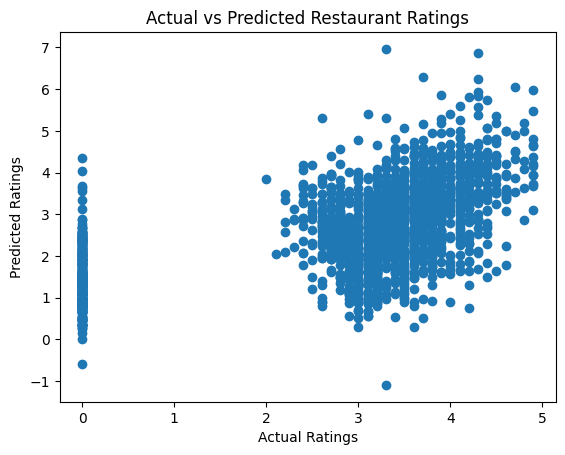

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Restaurant Ratings")
plt.show()


In [ ]:
import joblib

joblib.dump(lr, "restaurant_rating_model.pkl")

['restaurant_rating_model.pkl']

In [ ]:
import os

os.listdir()



['.config',
 'restaurant_rating_model.pkl',
 'Dataset .csv',
 'rating_model_dt.pkl',
 'rating_model_lr.pkl',
 'Dataset  (1).csv',
 'sample_data']

Conclusion:

- Data was cleaned and missing values handled

- Categorical columns were encoded

- Train-test split was performed

- Two models were trained: Linear Regression & Decision Tree

- Linear Regression achieved R² = 0.35

- Decision Tree performance compared

- Linear Regression was selected as final model